# Introduction to Attention

Attention is a mechanism that helps models focus on important parts of an input.

Imagine a chatbot that processes the sentence: "The cat sat on the mat."; If we ask, "Where did the cat sit?", the chatbot should focus on the words "sat" and "mat" instead of other words.
Self-attention helps achieve this dynamically by computing relevance scores.


Mathematically, we want to map a Query (Q) and a set of Key (K) and Value (V) pairs to an output. or in simpler terms, we want to find the most relevant value (V) eg. "mat" given the query (Q) eg. "cat" and the key (K) eg. "sat".



## Step 1: Compute the relevance scores between the Query (Q) and the Key (K)


This is done by taking the dot product of the Query (Q) and the Key (K) because the dot product 
gives us a measure of similarity between two vectors.

Example:
If two vectors are pointing in the same direction, their dot product is large (high similarity).
If they are perpendicular, the dot product is small (low similarity).

Mathematically:

$$ scores = QK^T$$

Where:
- Q is the Query matrix
- K is the Key matrix
- T denotes the transpose operation

> Transpose operation is used to ensure that the dimensions of the matrices are compatible for multiplication.

Each element in the resulting matrix represents how much focus should be given
to a word when processing another word.


In [2]:
# import relevant packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def compute_attention_scores(Q, K):
    return np.dot(Q, K.T)  # Compute dot product


In [4]:

# Example to demonstrate dot product and similarity
cat = np.array([1, 2, 3])
dog = np.array([1, 2, 3]) # Similar to cat (animals, pets, mammals) (High Similarity)
table = np.array([-1, -2, -3]) # Very different from cat (objects, furniture) (Low Similarity)
sit = np.array([3, 2, 1]) # somewhat related to cat (actions, verbs) (Medium Similarity)

print("Dot Product Similarity Examples:")
print("cat · dog (High Similarity):", np.dot(cat, dog))
print("cat · table (Opposite Direction - Low Similarity):", np.dot(cat, table))
print("cat · sit (Different Direction - Medium Similarity):", np.dot(cat, sit))



Dot Product Similarity Examples:
cat · dog (High Similarity): 14
cat · table (Opposite Direction - Low Similarity): -14
cat · sit (Different Direction - Medium Similarity): 10


## step 2: Normalize the scores

Now that we have the relevance scores, we need to normalize them so that they are between 0 and 1.

> 0 means the word is not important, and 1 means the word is very important.

This is done using the softmax function, which squashes the scores between 0 and 1.

matheamtically:

$$ softmax(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$

Where:
- e is the exponential function
- x_i is the raw score for a particular word (ie the i-th word)
- j is the total number of words
- the denominator is the sum of the exponential scores of all words and ensures that the scores sum to 1.


In [15]:
def softmax(attention_scores):
    """Compute softmax values for each row of attention_scores."""
    
    exp_x = np.exp(attention_scores - np.max(attention_scores))  # Subtract maximium value of x to prevent overflow
    return exp_x / np.sum(exp_x,axis=1, keepdims=True)  # Compute softmax values for each sets of scores in attention_scores


In [16]:
word_vectors = np.array([cat, dog, table, sit])
words = ['cat', 'dog', 'table', 'sit']
scores = compute_attention_scores(word_vectors, word_vectors)

print("Dot Product Similarity Matrix:")
print(scores)


Dot Product Similarity Matrix:
[[ 14  14 -14  10]
 [ 14  14 -14  10]
 [-14 -14  14 -10]
 [ 10  10 -10  14]]



Softmax Scores:
[[4.95462643e-01 4.95462643e-01 3.42582695e-13 9.07471484e-03]
 [4.95462643e-01 4.95462643e-01 3.42582695e-13 9.07471484e-03]
 [6.91440011e-13 6.91440011e-13 1.00000000e+00 3.77513454e-11]
 [1.76684220e-02 1.76684220e-02 3.64173320e-11 9.64663156e-01]]


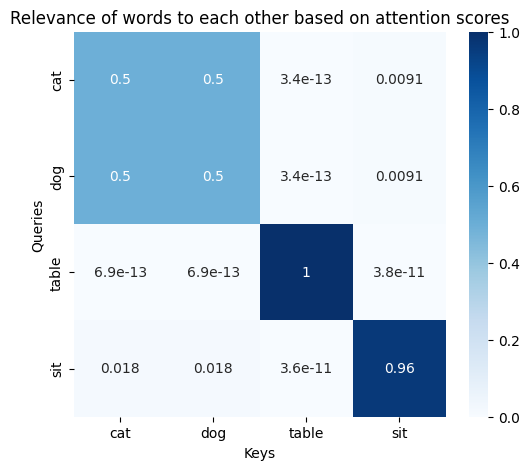

In [17]:
softmax_scores = softmax(scores)
print("\nSoftmax Scores:")
print(softmax_scores)


# Plot similarity grid
plt.figure(figsize=(6, 5))
sns.heatmap(softmax_scores, annot=True, cmap="Blues", xticklabels=words, yticklabels=words, cbar=True)
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.title("Relevance of words to each other based on attention scores")
plt.show()